In [136]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

# A Comparative Stylometry

We'll make texts of all the narrators in _The Moonstone_ again, so that we can compare their styles. 

In [139]:
moonstone = open('../moonstone.md').read()

In [140]:
moonstoneParts = moonstone.split('%%%%%')

In [141]:
bet1 = moonstoneParts[1]

In [142]:
# Write it out to a file to make it easier.
open('bet1.txt', 'w').write(bet1)

430752

In [143]:
clack = moonstoneParts[3]

In [144]:
bruff = moonstoneParts[5]

In [145]:
blake = moonstoneParts[6]

In [146]:
jennings = moonstoneParts[7]

In [147]:
blake2 = moonstoneParts[8]

In [148]:
cuff = moonstoneParts[9]

In [149]:
candy = moonstoneParts[10]

In [150]:
bet2 = moonstoneParts[11]

In [151]:
tfidf = TfidfVectorizer(use_idf=False, max_features=100)

In [152]:
allChars = [bet1, clack, bruff, blake, jennings, 
            blake2, cuff, candy, bet2]

In [153]:
[len(char) for char in allChars]

[430752, 169326, 57208, 236679, 80103, 39579, 24886, 4333, 4367]

And we'll need labels for these so that we can put labels on all the points we're going to create in our plot. 

In [154]:
allCharsLabels = ['Betteredge-1', 'Clack', 'Bruff', 'Blake', 'Jennings',
                  'Blake-2', 'Cuff', 'Candy', 'Betteredge-2']

In [155]:
allChars2 = allChars[:-3]

Let's cut out a few of the shorter texts, and break each one into two parts of equal sizes, just to check and make sure everything's working. 

In [156]:
[len(char) for char in allChars2]

[430752, 169326, 57208, 236679, 80103, 39579]

In [157]:
allChars3 = [char[:24000] for char in allChars2]

In [158]:
allChars4 = [char[24000:39000] for char in allChars2]

Create a big list of all the labels, prepending `1-` and `2-` to each, so that we know which part we're seeing: 

In [159]:
allCharsLabels1 = ['1-'+label for label in allCharsLabels][:6]
allCharsLabels2 = ['2-'+label for label in allCharsLabels][:6]

In [160]:
allCharsPieces = allChars3 + allChars4

In [161]:
allCharsPiecesLabels = allCharsLabels1 + allCharsLabels2

Compute word frequencies (i.e. a term frequency matrix) for all words in all narratives: 

In [162]:
tfTable = tfidf.fit_transform(allCharsPieces).todense()

Check the "shape" of the matrix. Here, 12 means that we have 12 documents (narratives), and 100 means that we're looking at the top 100 most frequent words (from `max_features` above). 

In [163]:
tfTable.shape

(12, 100)

Now reduce the number of dimensions in that matrix from 100 to 2, so that we can plot it easier and see the relationships easier: 

In [164]:
pca = PCA(n_components=2)

In [165]:
pcaOut = pca.fit_transform(tfTable)

Plot the results. Here I have several lists (X points, Y points, and labels) and I'm going through each using their indices. Iterating through indices (`for i in range(len())`) helps us loop over several lists at a time. 

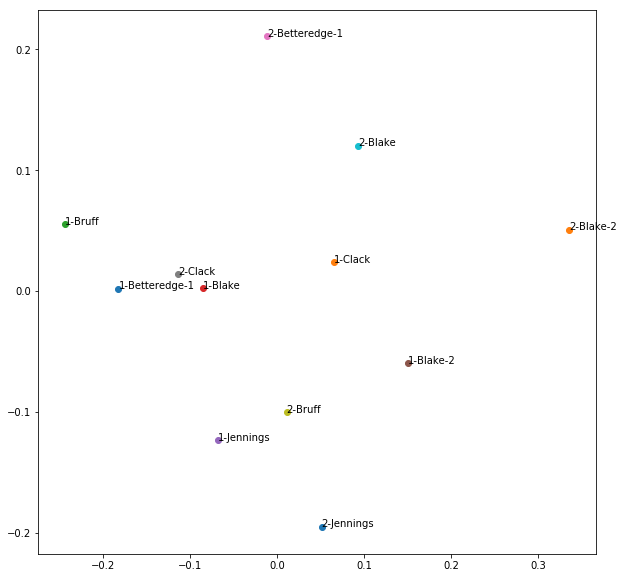

In [166]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allCharsPiecesLabels[i], (xs[i], ys[i]))

# Comparative Stylometry of Dickens and Collins

Let's compare the styles of several novels by Charles Dickens and Wilkie Collins. To amass a corpus of novels, I'll use `corpus-db.org`, an API which allows you to easily get metadata and full text for Project Gutenberg texts. We'll use the python `requests` library to get things from the Internet, and the `json` library to parse our results. 

In [167]:
response = requests.get('http://corpus-db.org/api/author/Collins, Wilkie')

Check to make sure the response came back OK. Since this is an experimental server, it doesn't always work. 

In [168]:
response.ok

True

Provided the above is True, we can parse our results, turing the JSON string into a Python dictionary. 

In [169]:
parsed = json.loads(response.text)

Now let's peek at some of the titles we got: 

In [170]:
[item['title'] for item in parsed]

['The Moonstone',
 'The Haunted Hotel: A Mystery of Modern Venice',
 'The Woman in White',
 'No Name',
 'Man and Wife',
 'The Black Robe',
 "A Rogue's Life",
 'Miss or Mrs.?',
 'The Law and the Lady',
 'The New Magdalen',
 'The Two Destinies',
 'The Frozen Deep',
 'After Dark',
 'The Evil Genius: A Domestic Story',
 "My Lady's Money",
 '"I Say No"',
 'Little Novels',
 'Armadale',
 'The Queen of Hearts',
 'The Legacy of Cain',
 'A Fair Penitent',
 'Antonina; Or, The Fall of Rome',
 'Poor Miss Finch',
 "Jezebel's Daughter",
 'The Guilty River',
 'Basil',
 'Blind Love',
 'The Dead Alive',
 'Heart and Science: A Story of the Present Time',
 'Hide and Seek',
 'The Fallen Leaves',
 "L'hôtel hanté",
 'John Jagon henki tahi kuollutko vai elävä?',
 'Ilman menestyksettä: Joulukertomus',
 'Sisar Rosa',
 'Rambles Beyond Railways; or, Notes in Cornwall taken A-foot',
 'Kamala yösija',
 'The Dead Secret: A Novel',
 'My Miscellanies, Vol. 1 (of 2)',
 'My Miscellanies, Vol. 2 (of 2)',
 'Valkopukuinen 

That's too many. And some of the ones at the end aren't in English. So let's get just the first 6 or so novels. 

In [171]:
collinsIDs = [item['id'] for item in parsed][:6]

Now let's write another query to get the full texts. This should take a long time, since we're getting the full text of all Collins novels here: 

In [172]:
response = requests.get('http://corpus-db.org/api/author/Collins, Wilkie/fulltext')

In [173]:
response.ok

True

In [174]:
parsed = json.loads(response.text)

In [175]:
collinsNovels = [item['text'] for item in parsed[:6]]

Now let's do the same for Dickens: 

In [176]:
response = requests.get('http://corpus-db.org/api/author/Dickens, Charles')

In [177]:
response.ok

True

In [178]:
parsed = json.loads(response.text)

In [180]:
[(item['id'], item['title']) for item in parsed]

[('46.0', 'A Christmas Carol in Prose; Being a Ghost Story of Christmas'),
 ('98.0', 'A Tale of Two Cities'),
 ('564.0', 'The Mystery of Edwin Drood'),
 ('580.0', 'The Pickwick Papers'),
 ('588.0', "Master Humphrey's Clock"),
 ('644.0', "The Haunted Man and the Ghost's Bargain"),
 ('650.0', 'Pictures from Italy'),
 ('653.0',
  'The Chimes: A Goblin Story of Some Bells That Rang an Old Year out and a New Year In'),
 ('675.0', 'American Notes'),
 ('676.0', 'The Battle of Life'),
 ('678.0', 'The Cricket on the Hearth: A Fairy Tale of Home'),
 ('699.0', "A Child's History of England"),
 ('700.0', 'The Old Curiosity Shop'),
 ('730.0', 'Oliver Twist'),
 ('766.0', 'David Copperfield'),
 ('786.0', 'Hard Times'),
 ('807.0', 'Hunted Down: The Detective Stories of Charles Dickens'),
 ('809.0', 'Holiday Romance'),
 ('810.0', "George Silverman's Explanation"),
 ('821.0', 'Dombey and Son'),
 ('824.0', 'Speeches: Literary and Social'),
 ('872.0', 'Reprinted Pieces'),
 ('882.0',
  'Sketches by Boz, Il

Again, this is too many, so let's just choose a few good ones: 

In [179]:
dickensIDs = [str(float(bookID)) for bookID in [98, 564, 580, 730, 766, 1423]]

In [181]:
dickensIDs

['98.0', '564.0', '580.0', '730.0', '766.0', '1423.0']

Now create a function that, given a book ID, gets the full text of that novel from the API: 

In [182]:
def getFullText(bookID): 
    response = requests.get('http://corpus-db.org/api/id/' + bookID + '/fulltext')
    if response.ok: 
        return json.loads(response.text)[0]['text']

In [183]:
dickensNovels = [getFullText(dickensID) for dickensID in dickensIDs]

And peek at the results so that we know we got the full texts: 

In [184]:
[book[:200] for book in dickensNovels]

['\n\n\n\n\n\n\n\nA TALE OF TWO CITIES\n\nA STORY OF THE FRENCH REVOLUTION\n\nBy Charles Dickens\n\n\nCONTENTS\n\n\n     Book the First--Recalled to Life\n\n     Chapter I      The Period\n     Chapter II     The Mail\n     ',
 '\n\nTranscribed from the Chapman and Hall, 1914 edition by David Price, email\nccx074@pglaf.org\n\n\n\n\n\n                        THE MYSTERY OF EDWIN DROOD\n\n\n                       [Picture: Rochester castle',
 "\n\n\n\n\n\n\n\nTHE PICKWICK PAPERS\n\n\nBy Charles Dickens\n\n\n\n\nCONTENTS\n\n\n1. The Pickwickians\n\n2. The first Day's Journey, and the first Evening's Adventures; with\ntheir Consequences\n\n3. A new Acquaintance--The",
 "\n\n\n\n\n\n\n\n\nOLIVER TWIST\n\nOR\n\nTHE PARISH BOY'S PROGRESS\n\n\nBY\n\nCHARLES DICKENS\n\n\n\n\nCONTENTS\n\n       I  TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE\n          CIRCUMSTANCES ATTENDING HIS BIRT",
 '\n\n\n\n\nDAVID COPPERFIELD\n\n\nBy Charles Dickens\n\n\n\n               AFFECTIONATELY INSCR

Manually add some labels: 

In [185]:
dickensLabels = ['Tale', 'Drood', 'Pickwick', 'Oliver', 'Copperfield', 'Thoroughfare']

In [186]:
collinsLabels = ['Moonstone',
 'Haunted Hotel',
 'Woman in White',
 'No Name',
 'Man and Wife',
 'Black Robe']

Compute word frequencies for all words of all these novels, and make the resulting matrix dense, rather than sparse (since PCA can't handle sparse matrices). 

In [187]:
tfTable = tfidf.fit_transform(collinsNovels + dickensNovels).todense()

Reduce the number of dimensions to 2 again, using the PCA object that we instantiated earlier: 

In [188]:
pcaOut = pca.fit_transform(tfTable)

In [189]:
allLabels = collinsLabels + dickensLabels

And plot the results. 

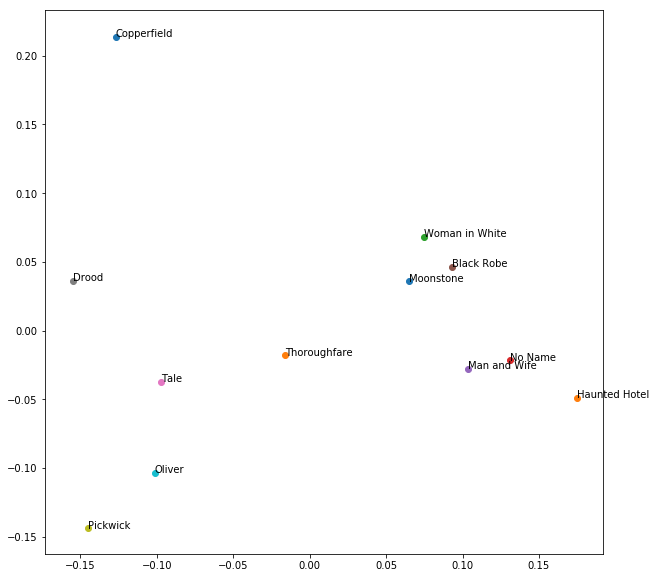

In [190]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allLabels[i], (xs[i], ys[i]))